# SIDARTHE Simulationen

Das folgende Skript berechnet wiederholt SIDARTHE Simulationen mit Unsicherheiten. Die Unsicherheiten werden als "weißes Rauschen" in jedem Simulationsschritt berechnet. Der "uncert" Vektor (0.5, 0, 0, 0, 0, 0, 0) bedeutet z.B, dass die Werte im Zustand I (infected) bis zu 50% rauschen soll. Dies wird erreicht, indem in der [Euler-Maruyama-Methode](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method) eine Standardabweichung von 0.5 / 3 angegeben wird. Das Rauschen wird als normalverteilte Zufallswerte berechnet, d.h. bei der Standardabweichung 0.5 / 3 liegen 99,7 % der Zufallswerte im Intervall [-0.5, 0.5].

Das Skript kann mit belibig vielen Wiederholungen aufgerufen werden und speichert bei Bedarf alle generierten Daten und berechnet einen Mittelwert aus den einzelnen Simulationen. Der Plot zeigt diese berechneten Mittelwerte.

### Anmerkung

Die auf GitHub veröffentlichte Version speichert die Figuren und Daten nicht automatisch. Einige Simulationen können sehr lange dauern, da sie nicht vorher berechnete Ergebnisse verwenden. Verringern Sie gegebenenfalls die Anzhal der Wiederholungen. Dieses Notebook stellt nur den benutzten Code vor. Für aussagekräftige Resultate werden zum Teil deutlich mehr Wiederholungen benötigt.

Zunächst implementieren wir eine einfache Version der Euler-Maruyama-Methode.

In [1]:
from sidarthe_functions_and_classes import *

In [2]:
# slow version!
def euler_maruyama8(dF, steps, dt, x, uncert7):
    """doc"""
    global counter
    for i in range(1, steps+1):
        random7 = uncert7 * np.random.randn(7) / 3
        y = np.empty(8)
        y[1:] = x[1:] + dt * dF(0, x)[1:] + np.sqrt(dt) * random7 * x[1:]
        while np.sum(y[1:]) >= 1:
            random7 = uncert7 * np.random.randn(7) / 3
            y[1:] = x[1:] + dt * dF(0, x)[1:] + np.sqrt(dt) * random7 * x[1:]
            counter += 1  # needs global counter!
        y[0] = 1 - np.sum(y[1:])
        x = y

    return y

def run_eul_maru(parameters: Parameters8 = Parameters8(),
                 reps: int = 1,
                 steps: int = 24,
                 t_0: int = 0,
                 t_end: int = 730,
                 uncert: np.array = np.array(
                     [0.5, 0.01, 0.2, 0.01, 0.025438, 0.5, 0.01])):
    """Repeatedly calculates the euler-maruyama simulation and returns all calculated data."""
    dF = sidarthe_system8(parameters)
    counter = 0
    dt = 1 / steps
    t = np.linspace(t_0, t_end, t_end + 1)
    time = len(t)
    dim = 8
    y = np.empty((reps, time, dim))
    for k in range(reps):
        y[k, 0, :] = parameters.y0
        for i in range(1, time):
            y[k, i, :] = euler_maruyama8(dF, steps, dt, y[k, i - 1, :], uncert)
    return counter, t, y

Mittelwerte aus den Simulationen mit neben den Verläufen ohne Rauschen und finale Werte der Simulation:

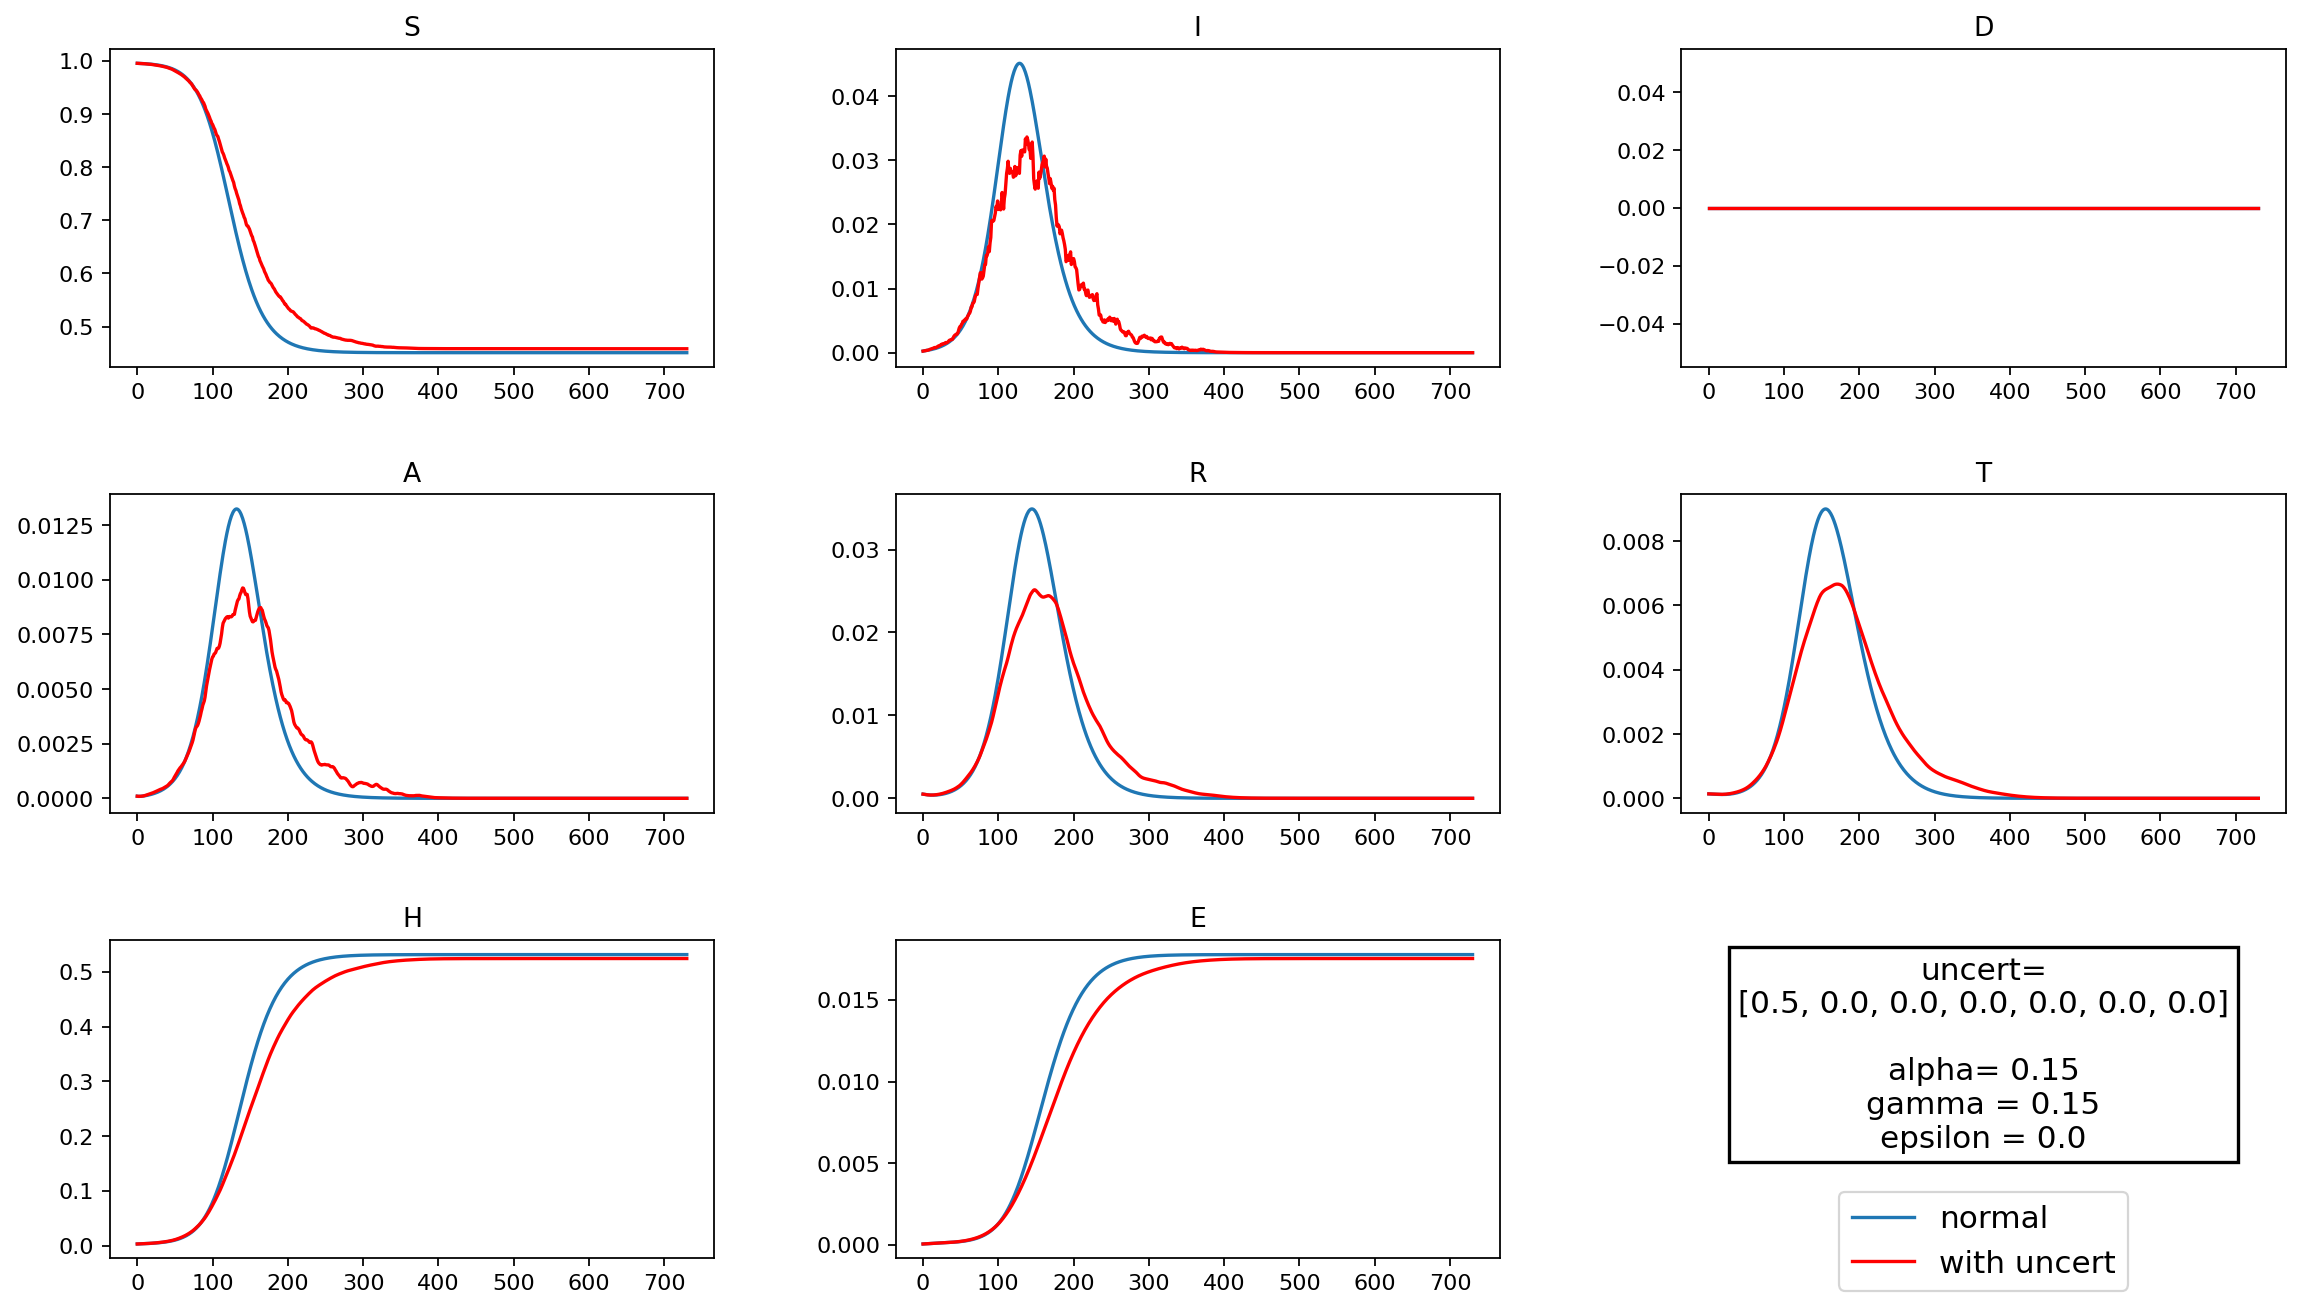

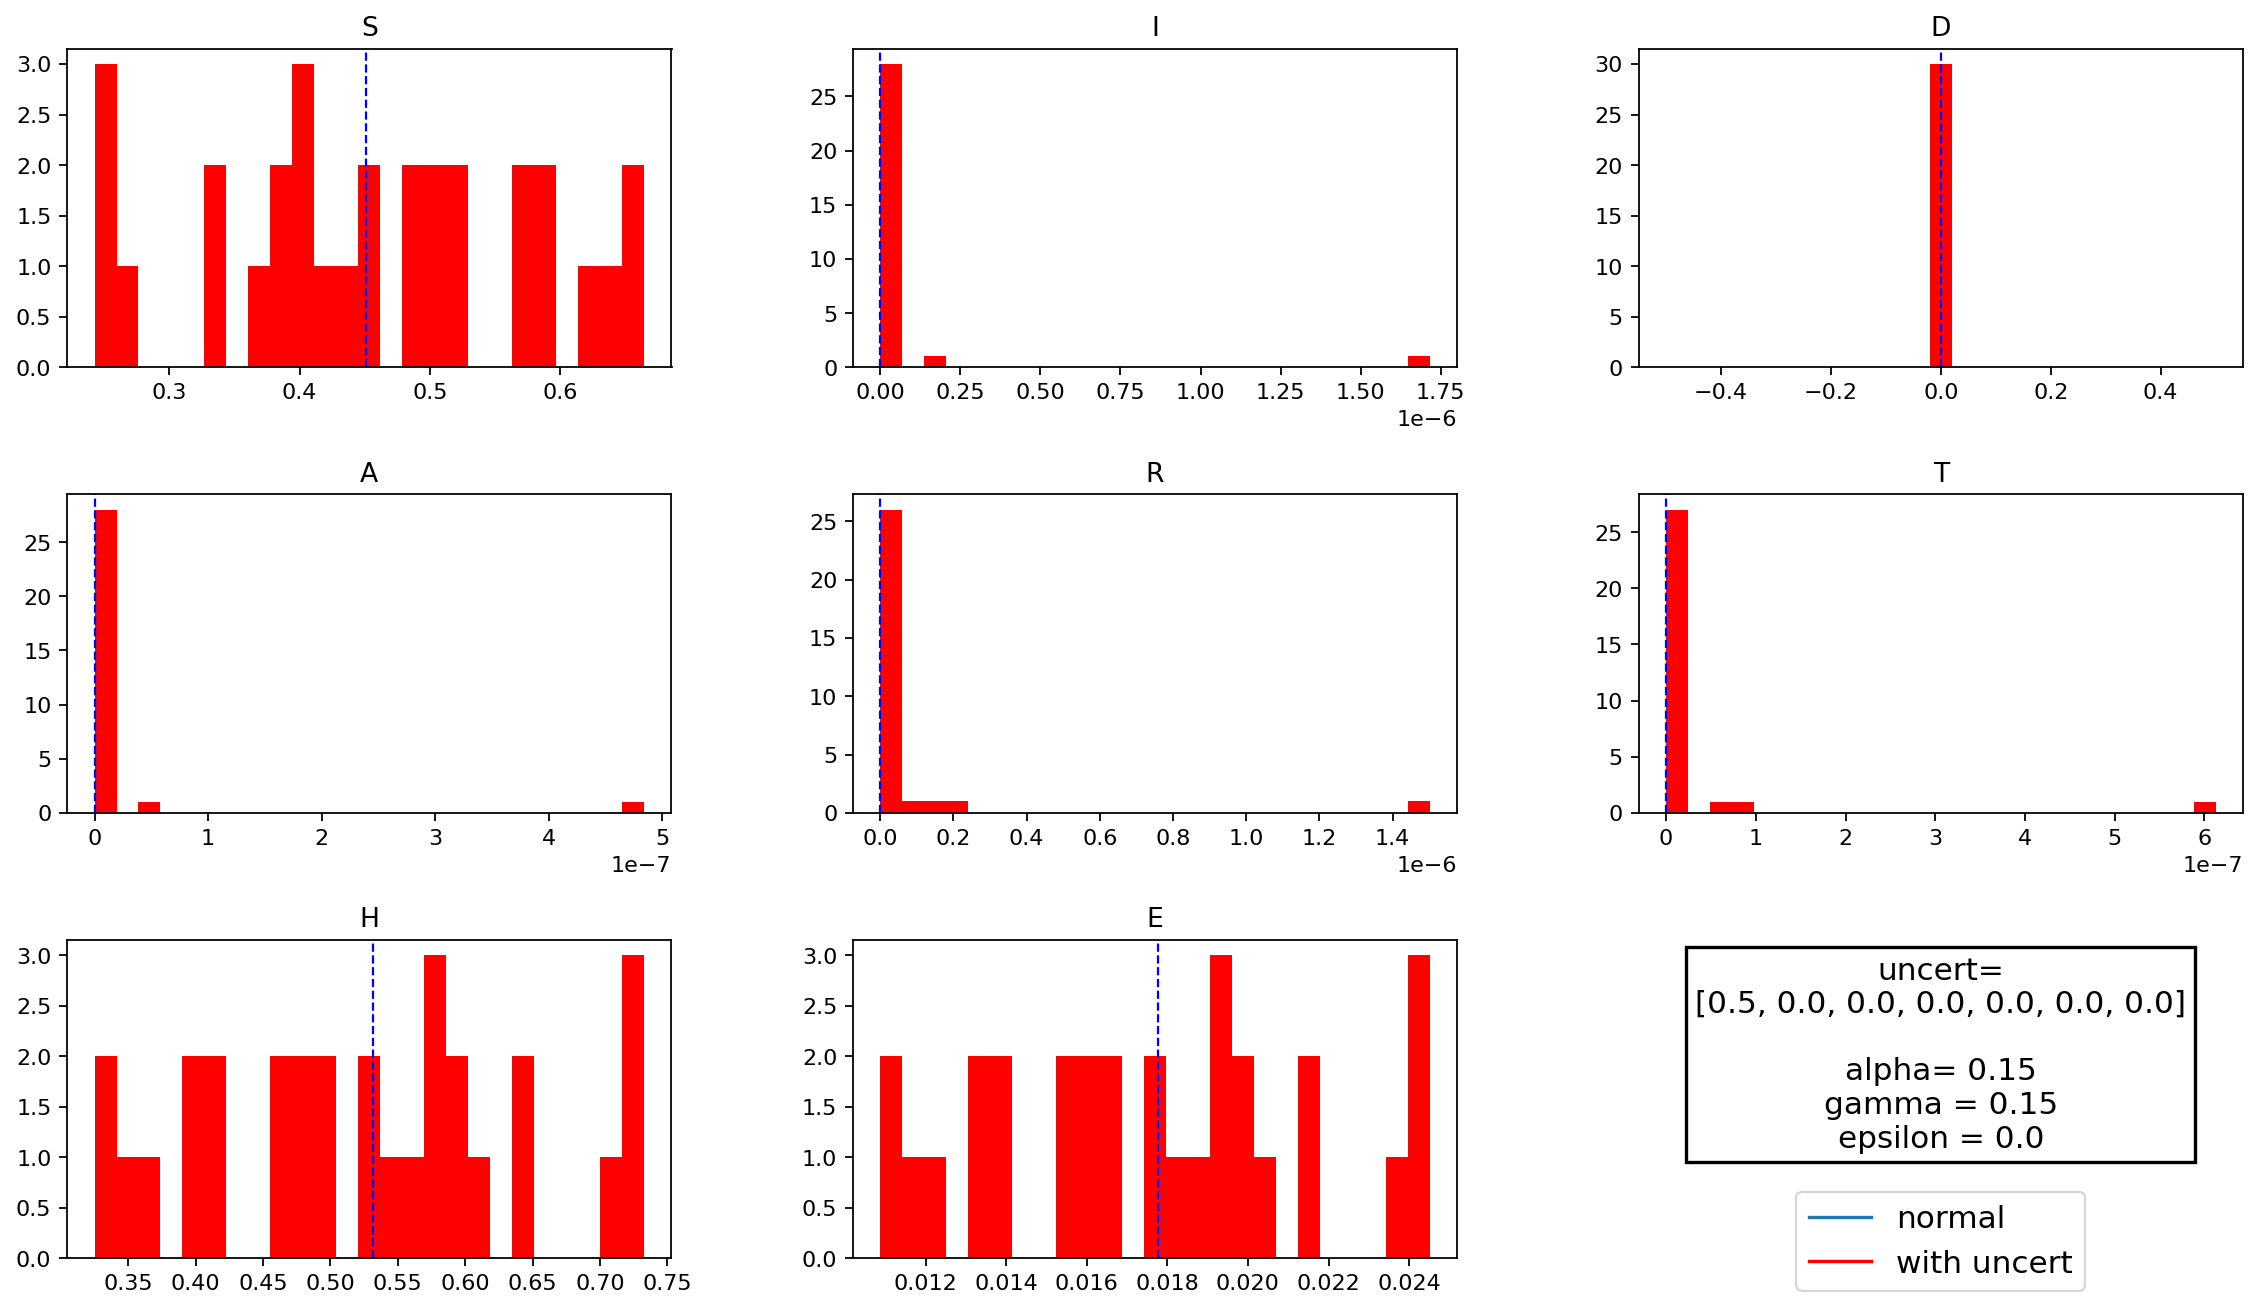

In [3]:
#uncert_list = [
#    np.array([0.5, 0.01, 0.2, 0.01, 0.025438, 0.5, 0.01]),
#    np.array([0.5, 0.01, 0.2, 0.01, 0.025438, 0.5, 0.01]) / 2,
#    np.array([0.5, 0, 0, 0, 0, 0, 0]),
#    np.array([0.25, 0.005, 0.1, 0.005, 0.012719, 0.1, 0.005])
#]
uncert_list = [np.array([0.5, 0, 0, 0, 0, 0, 0])]

for uncert in uncert_list:

    reps = 30

    counter, t, y = run_eul_maru(reps=reps, uncert=uncert)

    time = len(t)
    dim = 8

    m = np.empty((time, dim))

    for i in range(time):
        for j in range(dim):
            m[i, j] = np.mean(y[:, i, j])
            
    p = Parameters8()
    t, y_normal = sidarthe_simulation8(p)

    fig = plt.figure(figsize=(16, 9), dpi=160)

    plt.subplot(3, 3, 1)
    plt.plot(t, y_normal[:, 0])
    plt.plot(t, m[:, 0], color="red")
    plt.title("S")

    plt.subplot(3, 3, 2)
    plt.plot(t, y_normal[:, 1])
    plt.plot(t, m[:, 1], color="red")
    plt.title("I")

    plt.subplot(3, 3, 3)
    plt.plot(t, y_normal[:, 2])
    plt.plot(t, m[:, 2], color="red")
    plt.title("D")

    plt.subplot(3, 3, 4)
    plt.plot(t, y_normal[:, 3])
    plt.plot(t, m[:, 3], color="red")
    plt.title("A")

    plt.subplot(3, 3, 5)
    plt.plot(t, y_normal[:, 4])
    plt.plot(t, m[:, 4], color="red")
    plt.title("R")

    plt.subplot(3, 3, 6)
    plt.plot(t, y_normal[:, 5])
    plt.plot(t, m[:, 5], color="red")
    plt.title("T")

    plt.subplot(3, 3, 7)
    plt.plot(t, y_normal[:, 6])
    plt.plot(t, m[:, 6], color="red")
    plt.title("H")

    plt.subplot(3, 3, 8)
    line1, = plt.plot(t, y_normal[:, 7])
    line2, = plt.plot(t, m[:, 7], color="red")
    plt.title("E")

    ax = plt.subplot(3, 3, 9)
    ax.axis("off")
    ax.text(0.5,
            0.35,
            "uncert=\n" + str(list(uncert)) + 2 * "\n" + "alpha= 0.15\ngamma = 0.15\nepsilon = 0.0",
            size=14,
            ha="center",
            bbox={
                'facecolor': 'white',
                'linewidth': 1.5
            })

    plt.legend([line1, line2], ["normal", "with uncert"],
               bbox_to_anchor=(0.5, -0.15),
               loc='lower center',
               fontsize=14)

    plt.subplots_adjust(top=0.92,
                        bottom=0.08,
                        left=0.10,
                        right=0.95,
                        hspace=0.4,
                        wspace=0.3)
    plt.show()
    
    fig = plt.figure(figsize=(16, 9), dpi=160)

    plt.subplot(3, 3, 1)
    plt.hist(np.squeeze(y[:, 730, 0]), bins = 25, color="red")
    plt.axvline(y_normal[730, 0], color='blue', linestyle='dashed', linewidth=1)
    plt.title("S")

    plt.subplot(3, 3, 2)
    plt.hist(np.squeeze(y[:, 730, 1]), bins = 25, color="red")
    plt.axvline(y_normal[730, 1], color='blue', linestyle='dashed', linewidth=1)
    plt.title("I")

    plt.subplot(3, 3, 3)
    plt.hist(np.squeeze(y[:, 730, 2]), bins = 25, color="red")
    plt.axvline(y_normal[730, 2], color='blue', linestyle='dashed', linewidth=1)
    plt.title("D")

    plt.subplot(3, 3, 4)
    plt.hist(np.squeeze(y[:, 730, 3]), bins = 25, color="red")
    plt.axvline(y_normal[730, 3], color='blue', linestyle='dashed', linewidth=1)
    plt.title("A")

    plt.subplot(3, 3, 5)
    plt.hist(np.squeeze(y[:, 730, 4]), bins = 25, color="red")
    plt.axvline(y_normal[730, 4], color='blue', linestyle='dashed', linewidth=1)
    plt.title("R")

    plt.subplot(3, 3, 6)
    plt.hist(np.squeeze(y[:, 730, 5]), bins = 25, color="red")
    plt.axvline(y_normal[730, 5], color='blue', linestyle='dashed', linewidth=1)
    plt.title("T")

    plt.subplot(3, 3, 7)
    plt.hist(np.squeeze(y[:, 730, 6]), bins = 25, color="red")
    plt.axvline(y_normal[730, 6], color='blue', linestyle='dashed', linewidth=1)
    plt.title("H")

    plt.subplot(3, 3, 8)
    plt.hist(np.squeeze(y[:, 730, 7]), bins = 25, color="red")
    plt.axvline(y_normal[730, 7], color='blue', linestyle='dashed', linewidth=1)
    plt.title("E")

    ax = plt.subplot(3, 3, 9)
    ax.axis("off")
    ax.text(0.5,
            0.35,
            "uncert=\n" + str(list(uncert)) + 2 * "\n" + "alpha= 0.15\ngamma = 0.15\nepsilon = 0.0",
            size=14,
            ha="center",
            bbox={
                'facecolor': 'white',
                'linewidth': 1.5
            })

    plt.legend([line1, line2], ["normal", "with uncert"],
               bbox_to_anchor=(0.5, -0.15),
               loc='lower center',
               fontsize=14)

    plt.subplots_adjust(top=0.92,
                        bottom=0.08,
                        left=0.10,
                        right=0.95,
                        hspace=0.4,
                        wspace=0.3)

    plt.show()

Um den Verlauf der SIDARTHE-Simulation besser zu verstehen, generieren wir sind zum Schluss noch zwei Stapelplots. Es können alle Parameter des Systems verändert werden. Standardwerte aller verfügbaren Parameter sind in der Datei `sidarthe_functions_and_classes.py` zu finden.

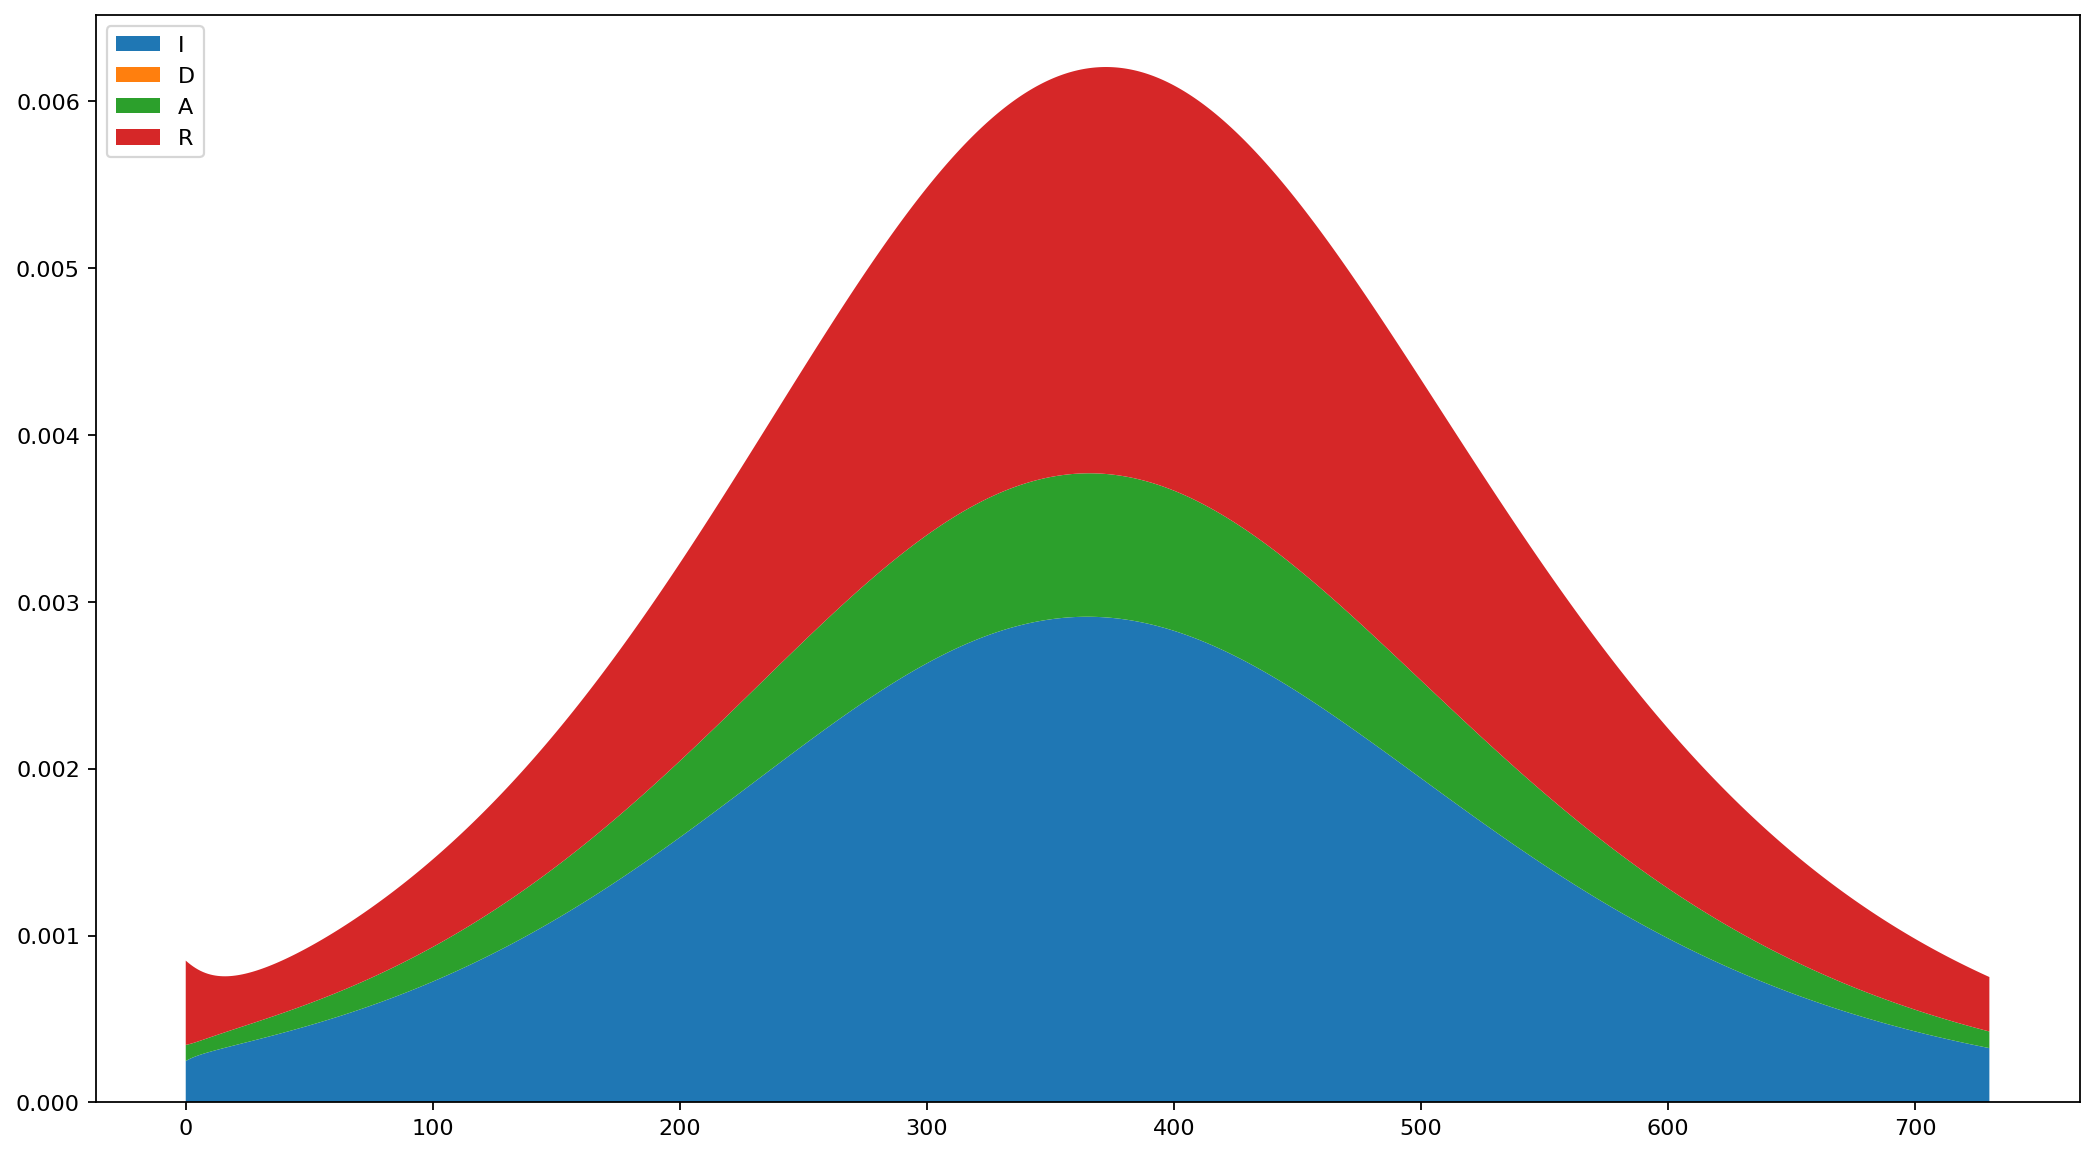

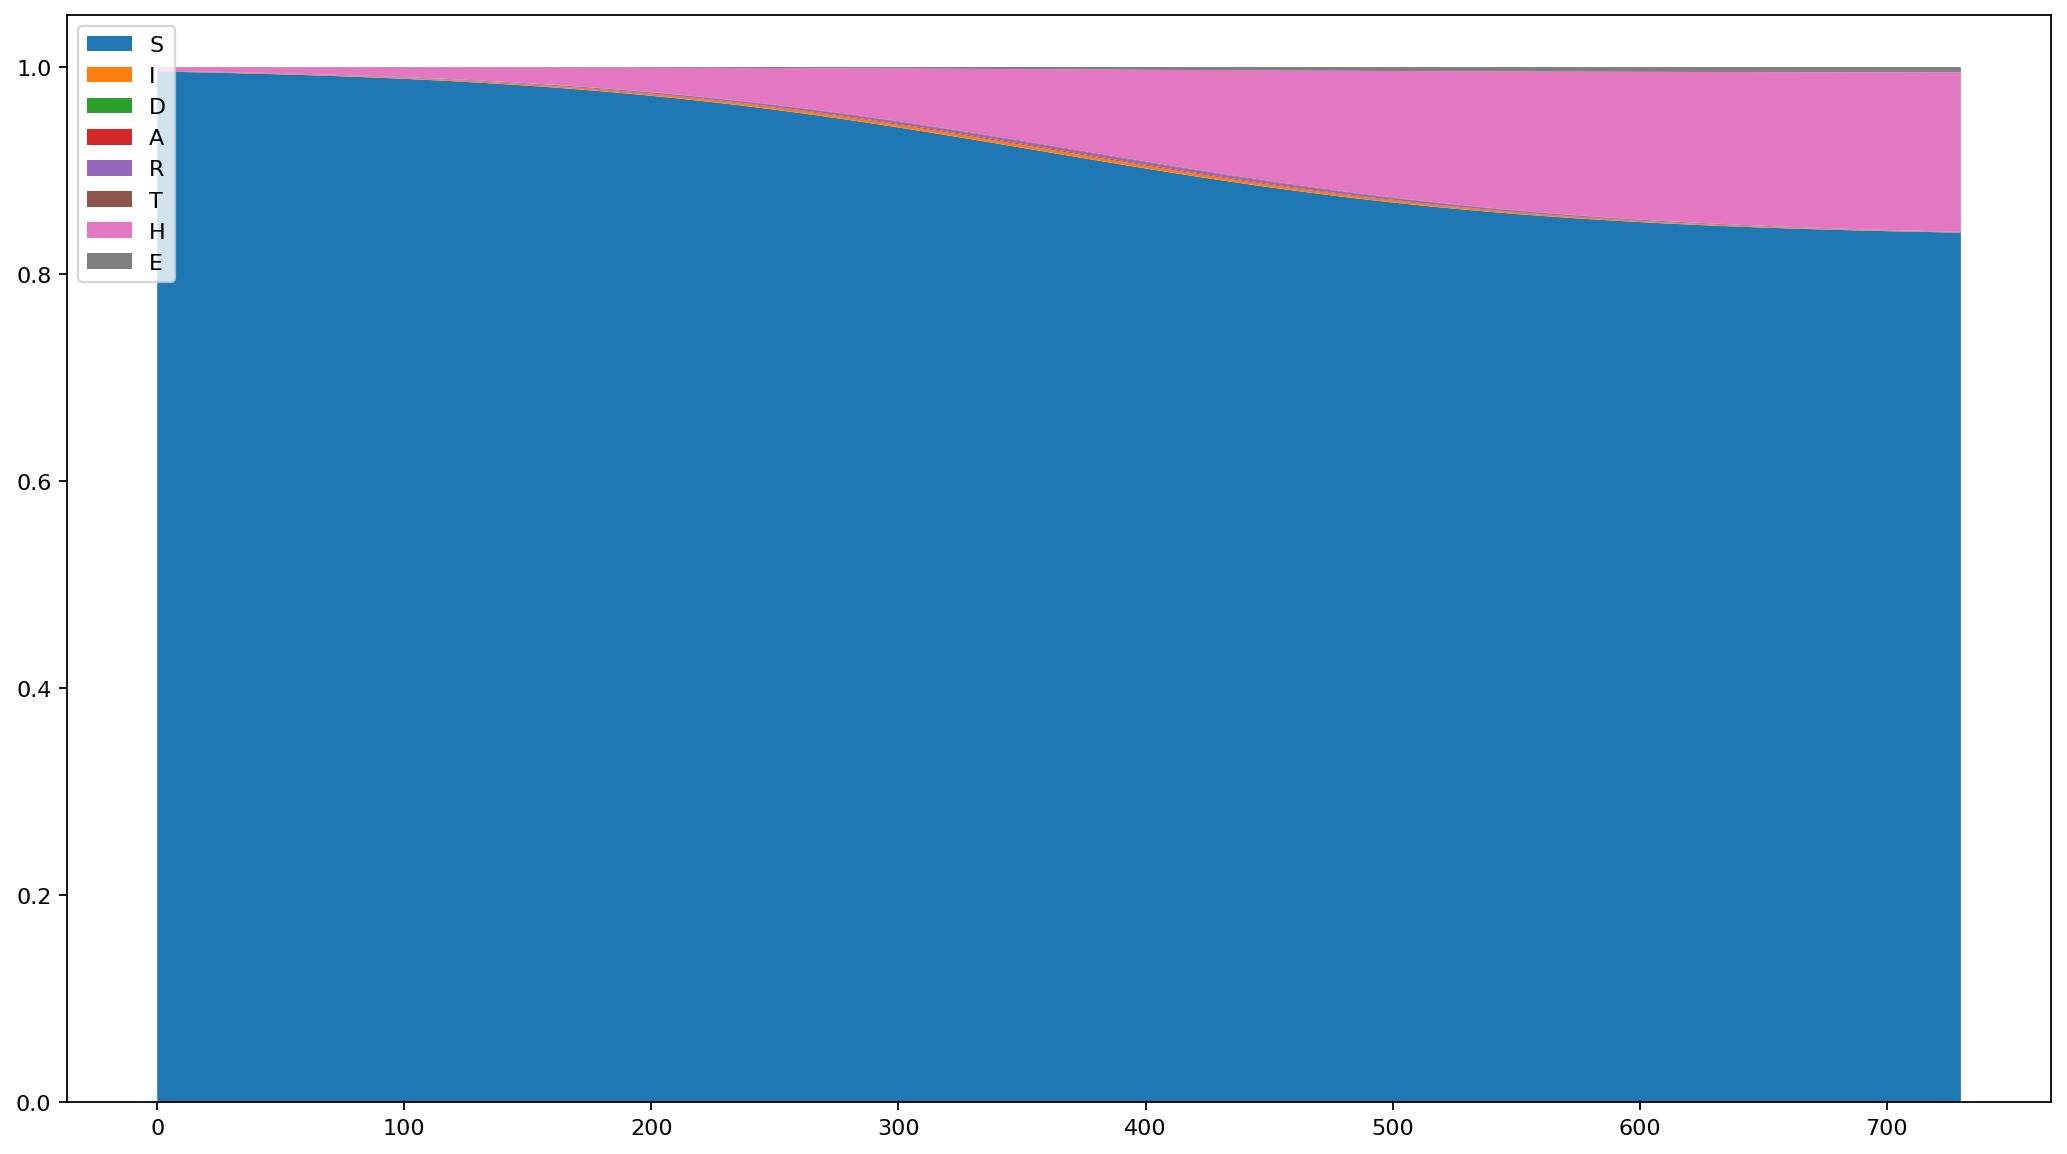

In [4]:
p = Parameters8(alpha = 0.1)
t, y = sidarthe_simulation8(p)

fig = plt.figure(figsize=(16, 9), dpi=160)
plt.stackplot(t,np.transpose(y[:,1:-3]), labels=["I","D","A","R"])
plt.legend(loc='upper left')
plt.show()

fig = plt.figure(figsize=(16, 9), dpi=160)
plt.stackplot(t,np.transpose(y), labels=["S","I","D","A","R","T","H","E"])
plt.legend(loc='upper left')
plt.show()